<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Word Embedding Visualization</H1></u></center>

In [1]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sentences = [['this', 'is', 'a', 'very', 'good', 'NLP', 'course'],
            ['this', 'is', 'a', 'NLP', 'course'],
            ['Word2Vec', 'NLP', 'text'],
            ['word', 'embedding', 'NLP','divya'],
            ['NLP', 'course', 'Word2Vec', 'embedding','prudhvi']]

In [3]:
model = Word2Vec(sentences, min_count=1)

C:\Users\Administrator\Anaconda3\envs\py36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [4]:
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [5]:
words = list(model.wv.vocab)
print(words)

['this', 'is', 'a', 'very', 'good', 'NLP', 'course', 'Word2Vec', 'text', 'word', 'embedding', 'divya', 'prudhvi']


In [6]:
print(model['course'])
print(len(model['course']))

[-1.1066254e-03 -2.8193237e-03  1.5724095e-03  4.5857932e-03
 -6.6517072e-04 -3.4106451e-03  2.1158904e-03  3.6243394e-03
  4.4804174e-03  1.2730607e-03 -3.0965961e-03 -3.5522636e-03
  2.3058681e-03  1.7850082e-03  1.9628278e-03  4.2919195e-03
 -2.5241247e-03 -3.1383364e-03 -1.7178816e-03 -5.2786001e-04
  4.7603492e-03  1.3370398e-03  1.0373516e-03 -1.8743786e-04
 -8.8391762e-04 -2.2854309e-03 -2.2799482e-03  1.6496399e-03
 -3.4995475e-03 -9.5888559e-04 -3.0467289e-03 -3.7858933e-03
  1.8541085e-03 -2.5685499e-03  8.2831993e-04  2.0486764e-03
  4.5736139e-03 -1.6870230e-03  2.9758239e-04 -2.2787603e-03
 -4.3213908e-03 -5.4881562e-05 -4.5377624e-04  1.6173777e-03
  4.1429973e-03 -4.0134168e-03 -1.1180970e-03 -6.1340193e-04
  3.6264679e-03 -5.7004483e-05 -2.2940408e-03 -2.4891994e-04
 -4.1065617e-03 -4.6864594e-03 -2.1864898e-03  2.7818605e-04
 -2.8575731e-03  1.6971410e-03 -3.2966842e-03 -4.0212465e-03
  1.8762390e-04  3.4129848e-03 -3.1619929e-04  3.2014966e-03
  4.6744053e-03 -1.75593

C:\Users\Administrator\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
model.save('../data/word_embeddings_model.bin')

In [8]:
new_model = Word2Vec.load('../data/word_embeddings_model.bin')
print(new_model)

Word2Vec(vocab=13, size=100, alpha=0.025)


## Visualizing Word Embeddings:

In [9]:
X = model[model.wv.vocab]

C:\Users\Administrator\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
X.shape

(13, 100)

In [11]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

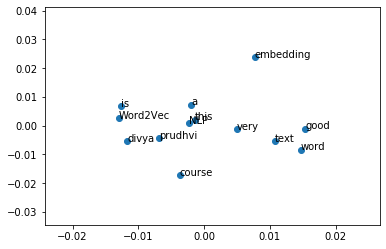

In [12]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Load Google's Word2Vec Embedding

In [40]:
import os
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\GoogleNews-vectors-negative300.bin')

In [45]:
from gensim.models import KeyedVectors

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

KeyboardInterrupt: 

In [ ]:
#queen = (king - man) + woman
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

## Reference:

GoogleNews-vectors: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit